In [ ]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [ ]:
### Some functions for plotting - don't worry about interpreting this code

def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color)

In [ ]:
# A function to generate the example data in this notebook - don't worry about interpreting this code

def r_table(r, num_points=1000):
    """
    Generate a table of N data points with a correlation approximately r
    """
    np.random.seed(8)
    x = np.random.normal(0, 1, num_points)
    z = np.random.normal(0, 1, num_points)
    y = r*x + (np.sqrt(1-r**2))*z
    return Table().with_columns('x', x, 'y', y)

## Prediction lines

In [32]:
example = r_table(0.99)
example

x,y
0.0912047,-0.0680119
1.09128,1.04391
-1.94697,-1.88316
-1.38635,-1.34674
-2.29649,-2.14933
2.40983,2.59627
1.72784,1.76089
2.20456,2.5933
0.794828,0.778249
0.976421,1.18139


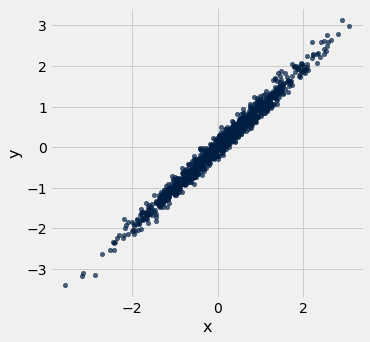

In [33]:
example.scatter('x', 'y')
#resize_window()

In [34]:
def predict_y(x_val):
    """
    Predicts y-values for the example table 
    """
    nearby_points = example.where('x', are.between(x_val-0.25, x_val + 0.25))
    return np.mean(nearby_points.column('y'))

In [35]:
example = example.with_column('Predicted y', example.apply(predict_y, 'x'))
example

x,y,Predicted y
0.0912047,-0.0680119,0.104202
1.09128,1.04391,1.05235
-1.94697,-1.88316,-1.85456
-1.38635,-1.34674,-1.32041
-2.29649,-2.14933,-2.17514
2.40983,2.59627,2.41498
1.72784,1.76089,1.70671
2.20456,2.5933,2.12065
0.794828,0.778249,0.791607
0.976421,1.18139,0.947165


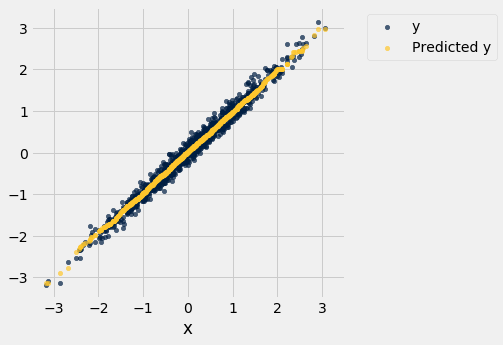

In [36]:
example.scatter('x')
resize_window()

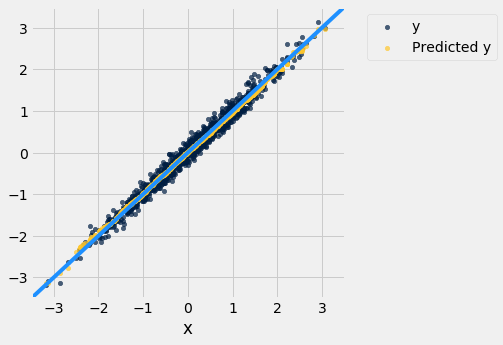

In [37]:
example.scatter('x')
draw_line(slope=1, intercept=0, color='dodgerblue')
resize_window()

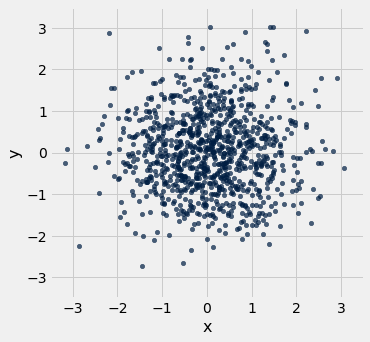

In [38]:
example = r_table(0)
example.scatter('x', 'y')
resize_window()

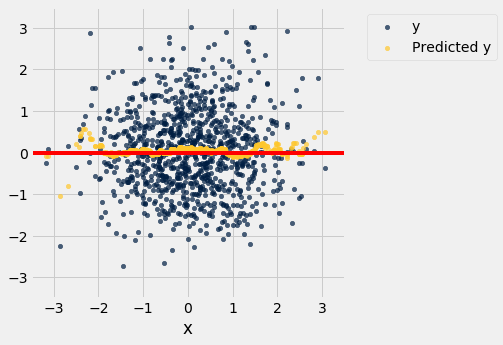

In [39]:
example = example.with_column('Predicted y', example.apply(predict_y, 'x'))
example.scatter('x')
draw_line(slope = 0)
resize_window()

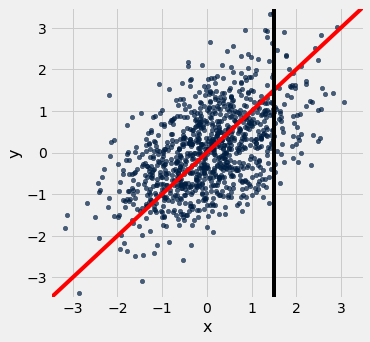

In [42]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()
draw_line(slope=1, intercept=0)
draw_vertical_line(1.5)

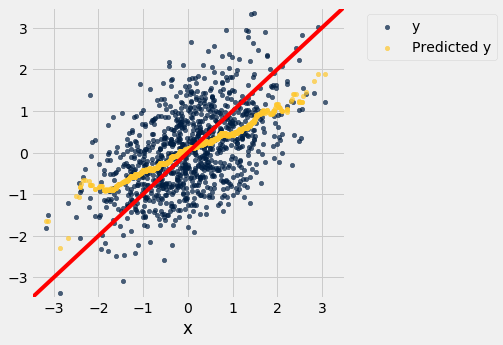

In [43]:
example = example.with_column('Predicted y', example.apply(predict_y, 'x'))
example.scatter('x')
draw_line(slope=1)
resize_window()

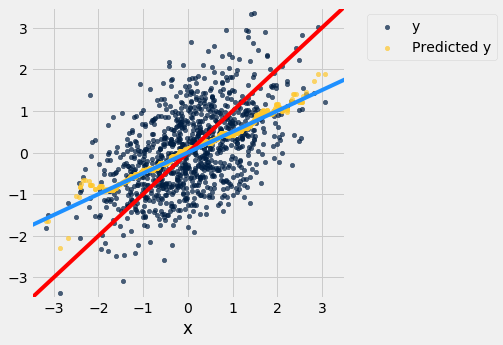

In [44]:
example.scatter('x')
draw_line(slope=1, intercept=0, color='red')
draw_line(slope=0.5, intercept=0, color='dodgerblue')
resize_window()

## Finding the Regression Line ##

In [45]:
def standard_units(arr):
    return (arr - np.mean(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.mean(x_standard*y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r*y_sd/x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

## Galton height data

In [46]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight'))
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [47]:
def predict_child(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(h - 0.5, h + 0.5))
    return close_points.column('Child').mean()   

In [48]:
heights_with_predictions = heights.with_column(
    'Average neighbor prediction', heights.apply(predict_child, 'MidParent'))

In [49]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.637360896969479, 22.63624054958975)

In [50]:
heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', galton_slope*heights.column('MidParent') + galton_intercept
)
heights_with_predictions

MidParent,Child,Average neighbor prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


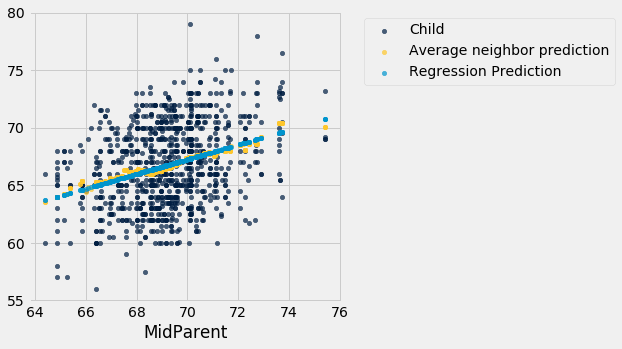

In [51]:
heights_with_predictions.scatter('MidParent')